In [1]:
import pandas as pd

# Step 1 - Exploratory Data Analysis

### 1.1 General infromation about dataset

In [118]:
df = pd.read_csv('../data/default-of-credit-card-clients.csv', header=1, index_col=0)

In [119]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [40]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### 1.2 Class imbalance

default payment next month
0    23364
1     6636
Name: count, dtype: int64


/var/folders/0x/y5cvzw51051dkrvrqgl1s_lc0000gn/T/ipykernel_24697/3029938081.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default payment next month', data=df, palette=['#1f77b4', '#ff7f0e'])


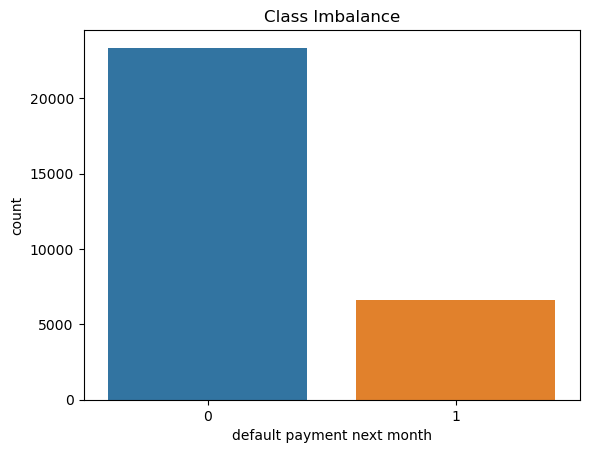

In [97]:
class_counts = df['default payment next month'].value_counts()
print(class_counts)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default payment next month', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Class Imbalance')
plt.savefig('class_imbalance.png', transparent=True)
plt.show()

### 1.3 Correlation matrix

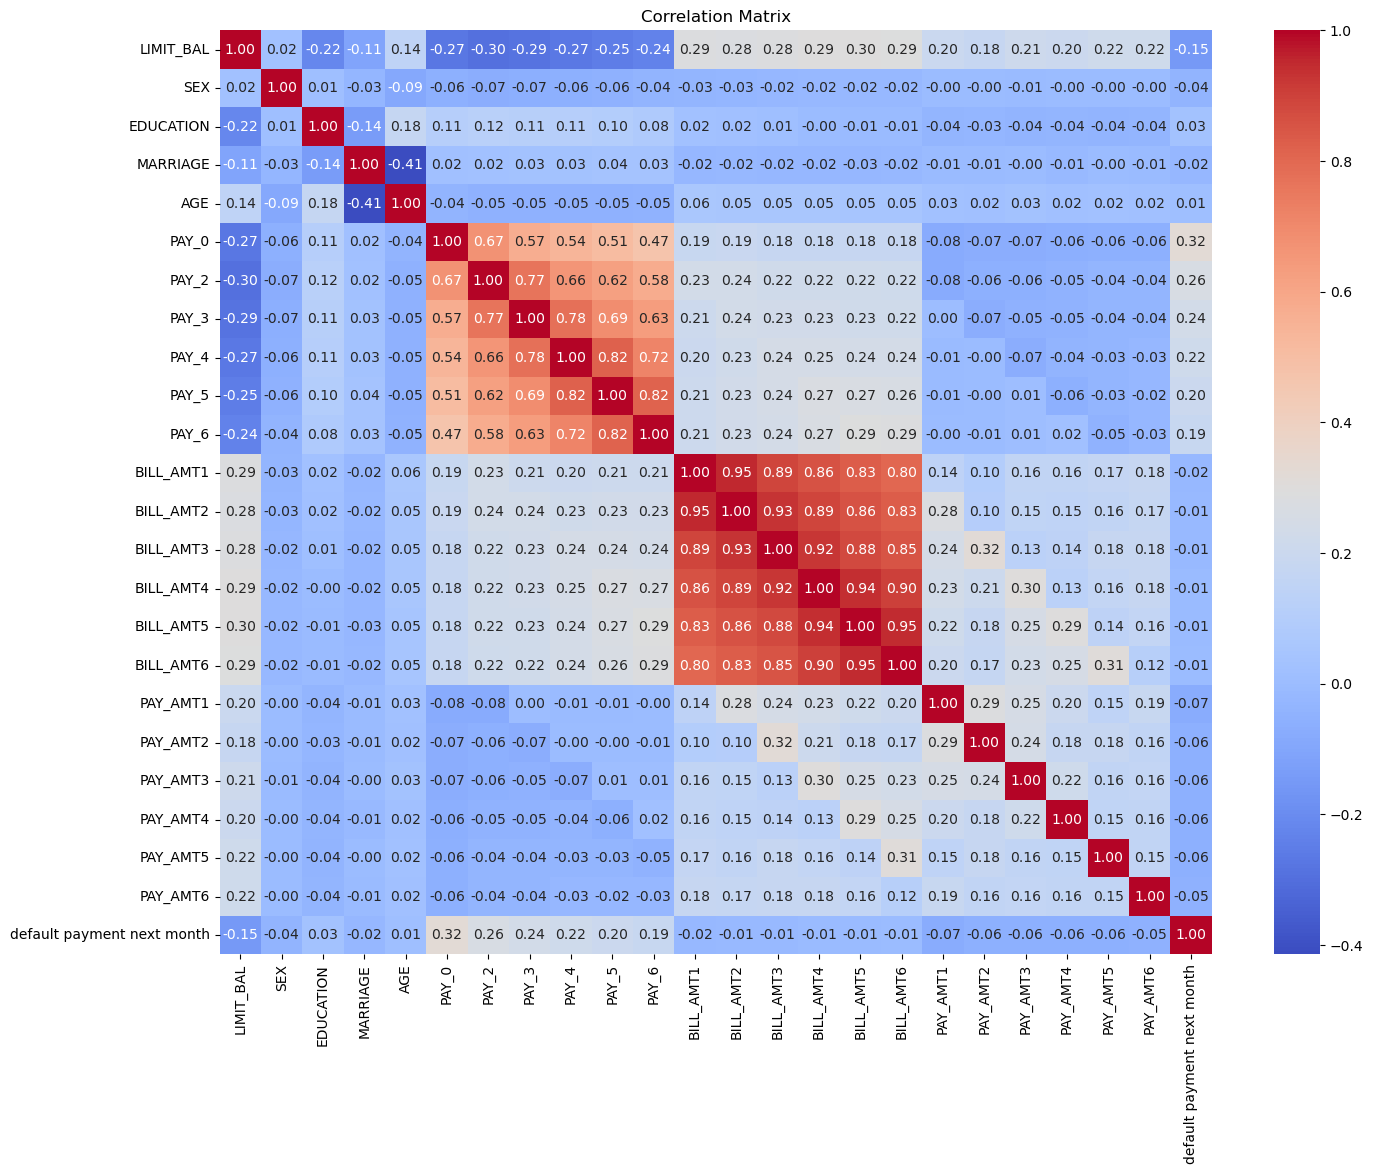

In [58]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))  # Increase figure size for larger boxes
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})  # Increase the annotation size
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', transparent=True)
plt.show()

### 1.4 Distribution of numerical features

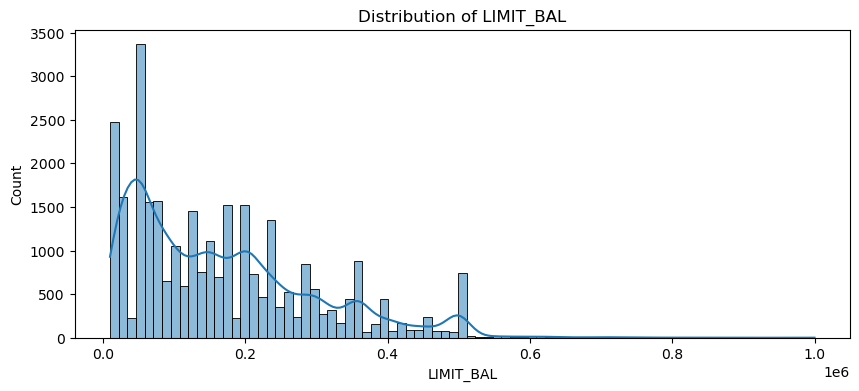

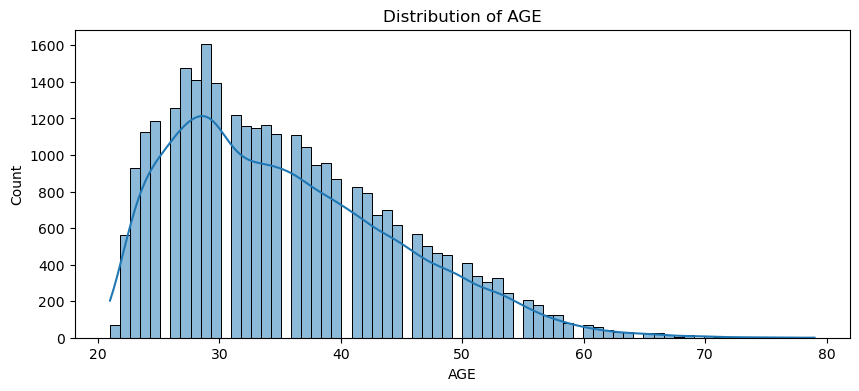

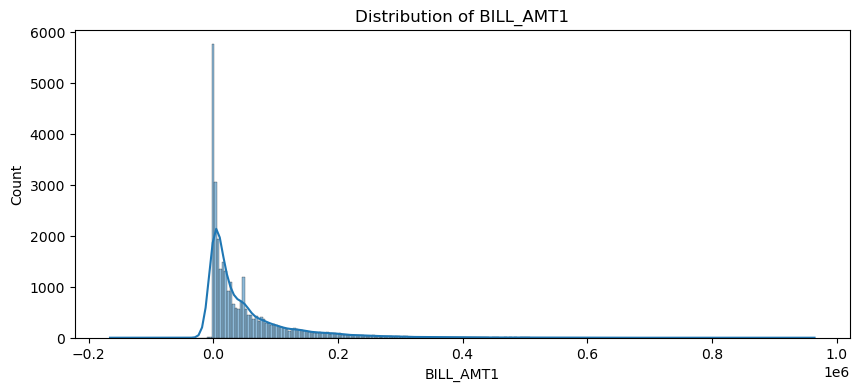

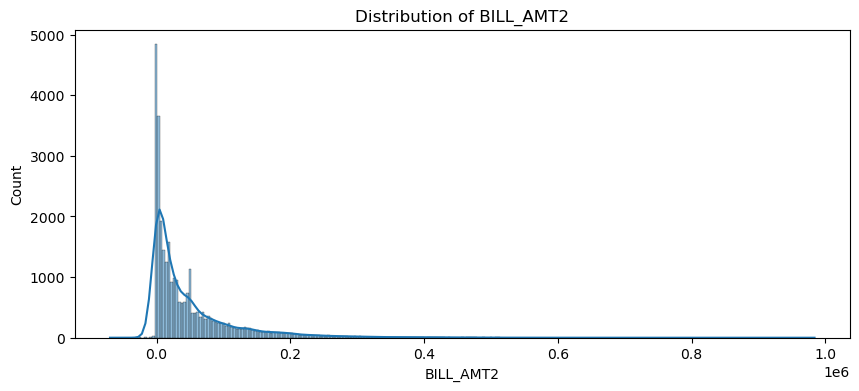

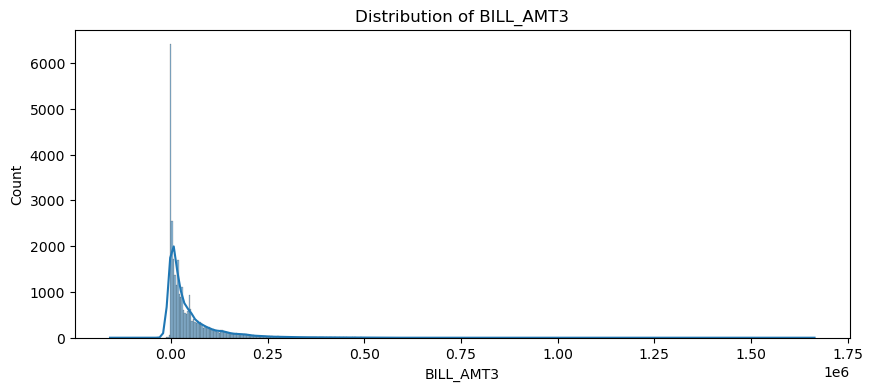

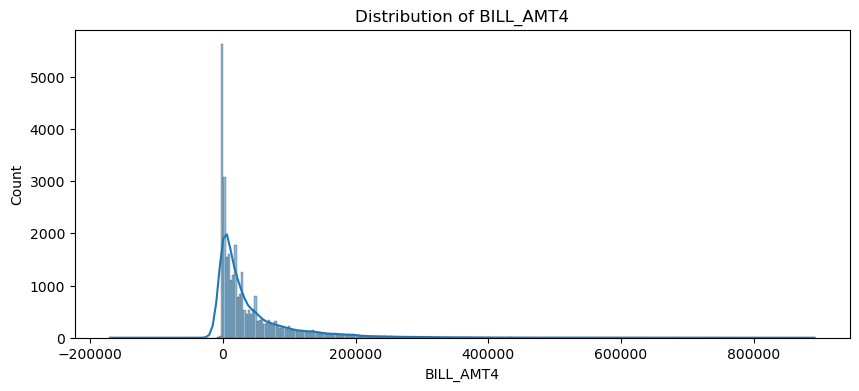

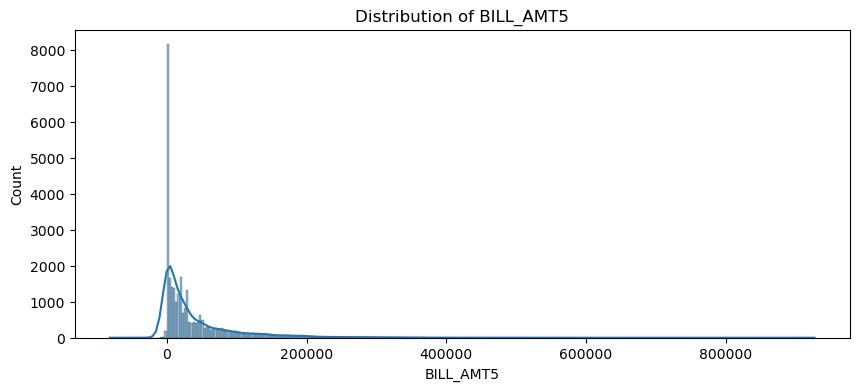

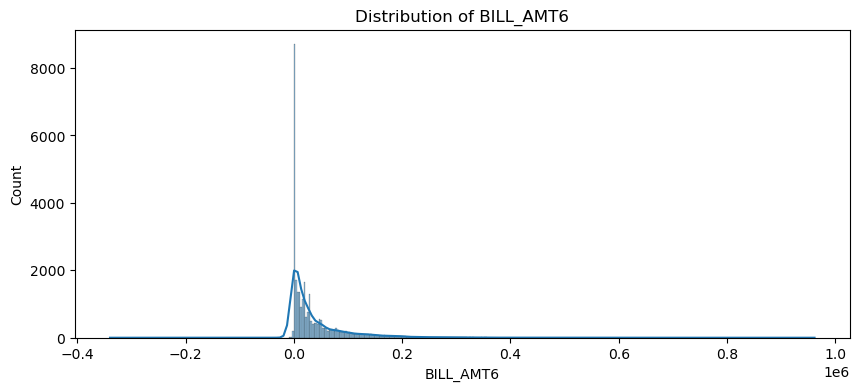

In [59]:
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    #plt.savefig(f'distribution_of_numerical_feature_{feature}.png', transparent=True)
    plt.show()

### 1.5 Boxplot of numerical features

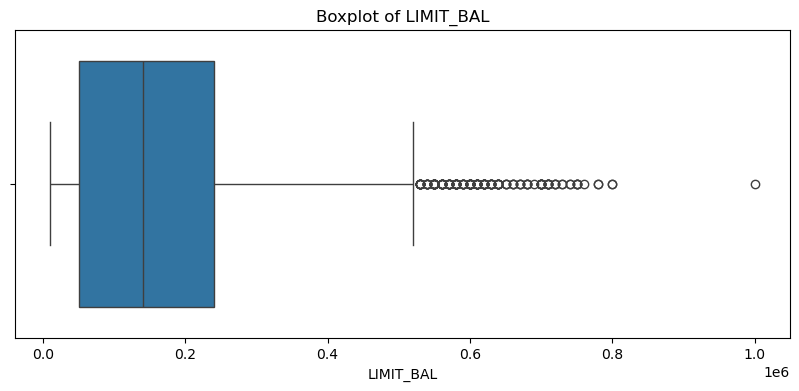

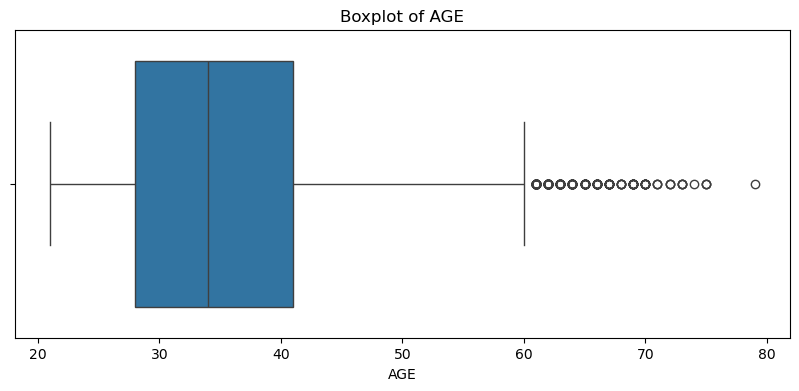

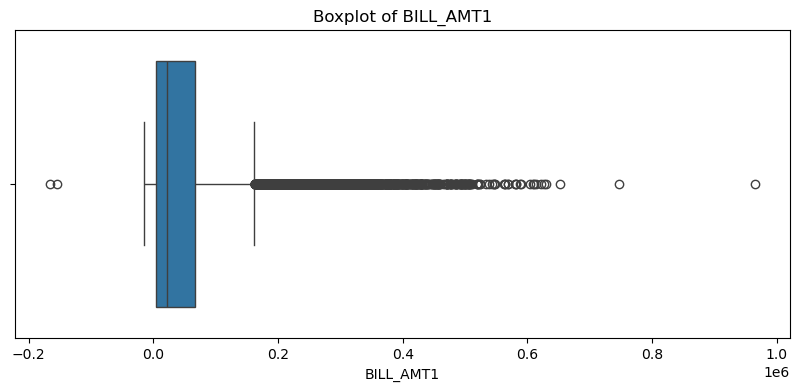

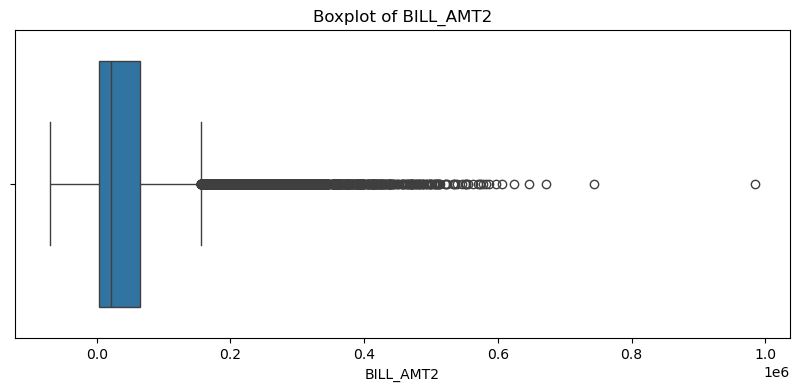

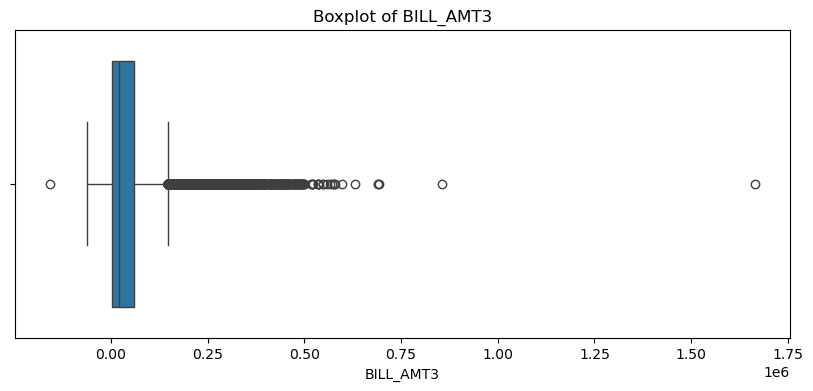

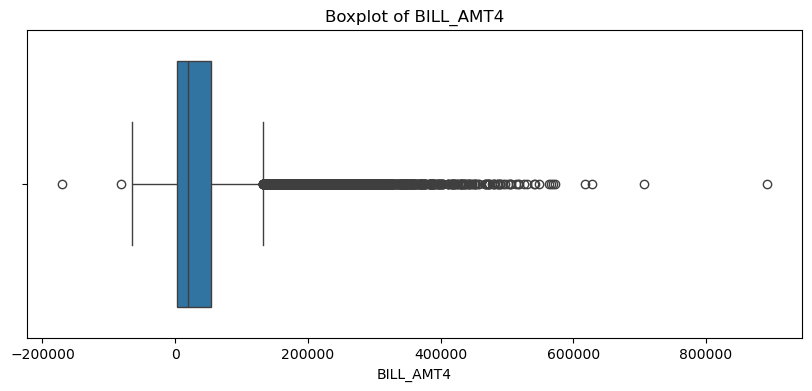

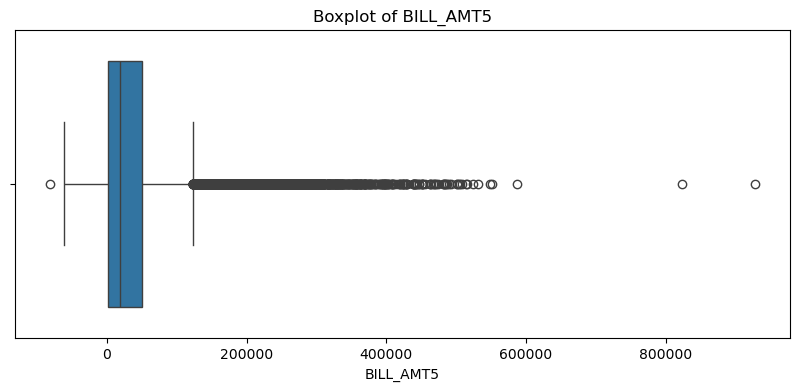

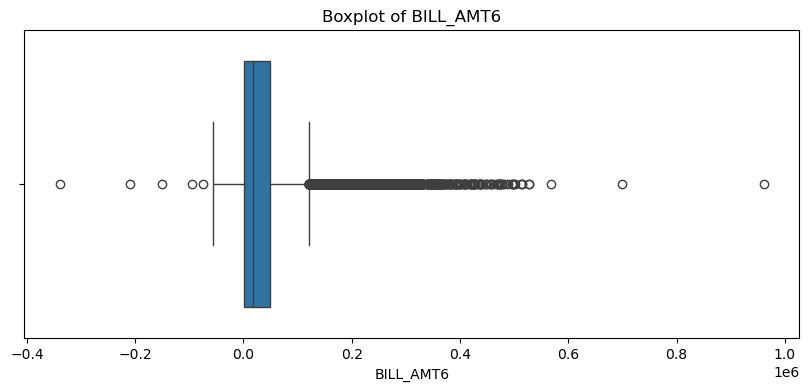

In [60]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    #plt.savefig(f'box_plot_of_numerical_feature_{feature}.png', transparent=True)
    plt.show()

# Step 2 - Learning

### 2.1 Upsampling of minority class using SMOTE

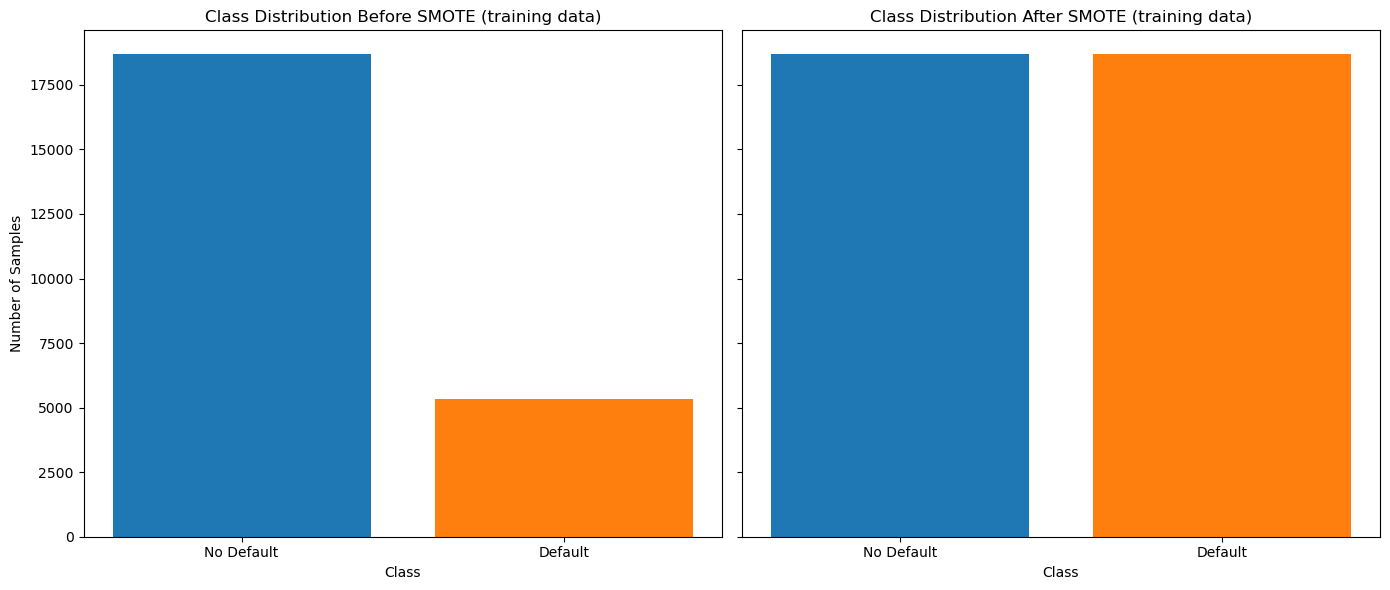

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class_counts_before = y_train.value_counts()

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

class_counts_after = y_train_smote.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(class_counts_before.index, class_counts_before.values, color=['C0', 'C1'])
axes[0].set_title('Class Distribution Before SMOTE (training data)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Samples')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Default', 'Default'])

axes[1].bar(class_counts_after.index, class_counts_after.values, color=['C0', 'C1'])
axes[1].set_title('Class Distribution After SMOTE (training data)')
axes[1].set_xlabel('Class')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Default', 'Default'])

plt.tight_layout()
#plt.savefig('class-distribution-before-after-upsampling-with-smote.png', transparent=True)
plt.show()

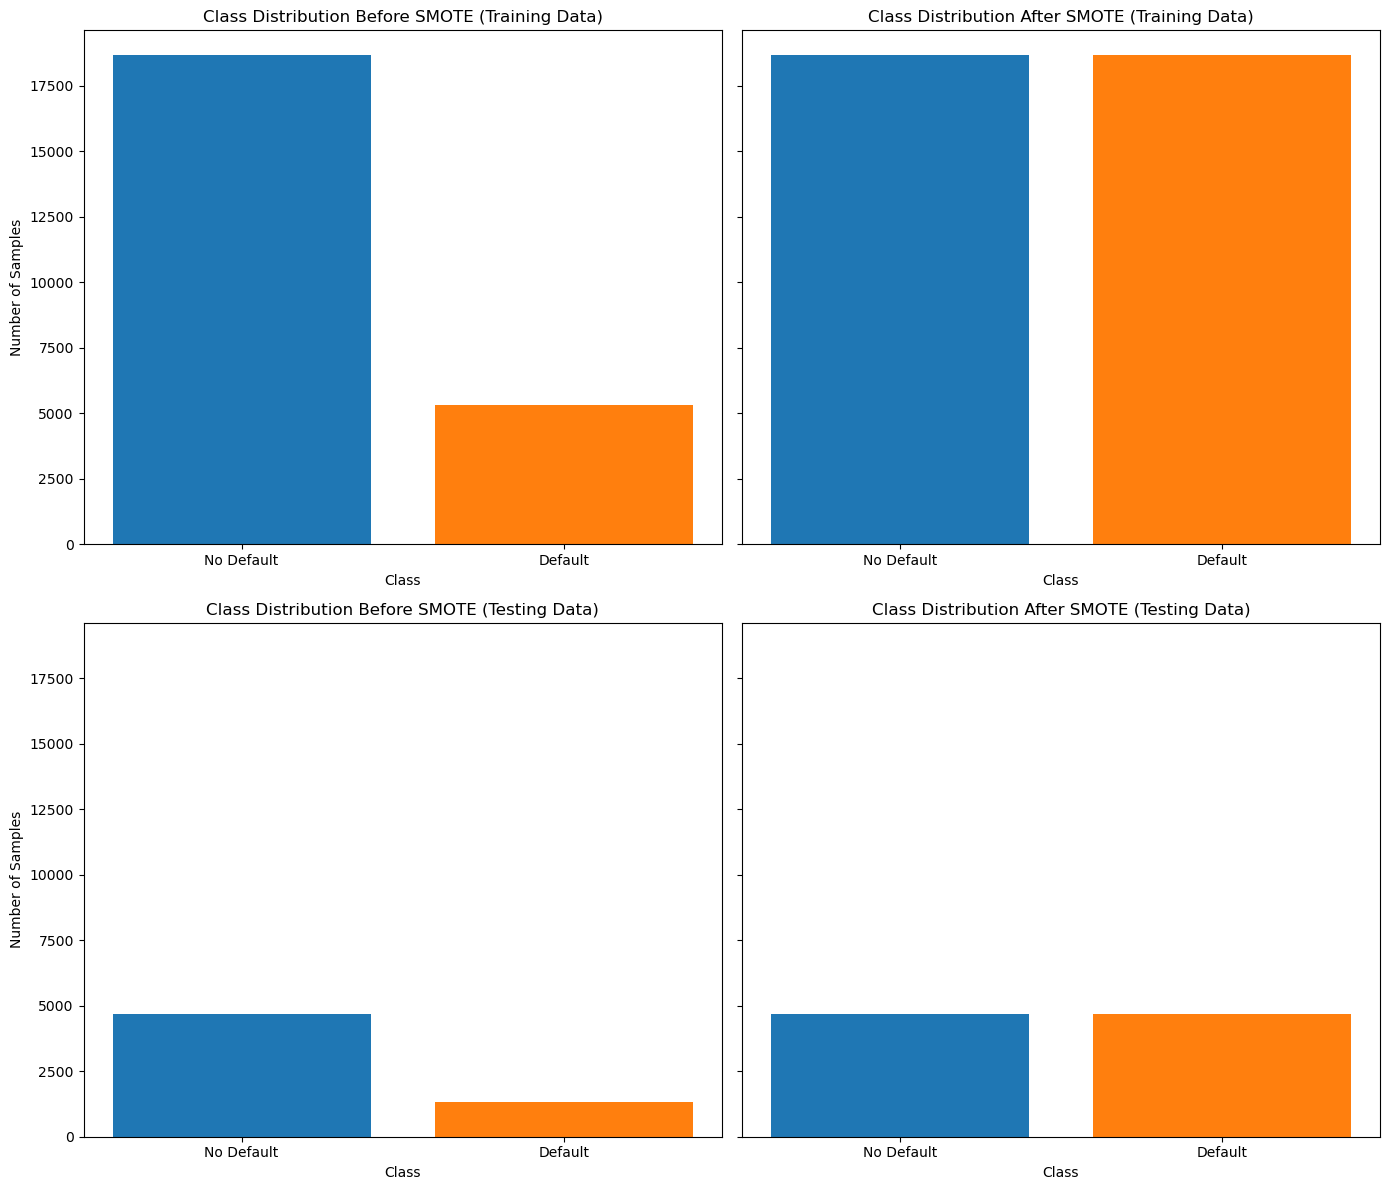

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv('../data/default-of-credit-card-clients.csv', header=1, index_col=0)

X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class_counts_before_train = y_train.value_counts()
class_counts_before_test = y_test.value_counts()

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

class_counts_after_train = y_train_smote.value_counts()
class_counts_after_test = y_test_smote.value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

axes[0, 0].bar(class_counts_before_train.index, class_counts_before_train.values, color=['C0', 'C1'])
axes[0, 0].set_title('Class Distribution Before SMOTE (Training Data)')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No Default', 'Default'])

axes[0, 1].bar(class_counts_after_train.index, class_counts_after_train.values, color=['C0', 'C1'])
axes[0, 1].set_title('Class Distribution After SMOTE (Training Data)')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No Default', 'Default'])

axes[1, 0].bar(class_counts_before_test.index, class_counts_before_test.values, color=['C0', 'C1'])
axes[1, 0].set_title('Class Distribution Before SMOTE (Testing Data)')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No Default', 'Default'])

axes[1, 1].bar(class_counts_after_test.index, class_counts_after_test.values, color=['C0', 'C1'])
axes[1, 1].set_title('Class Distribution After SMOTE (Testing Data)')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No Default', 'Default'])

plt.tight_layout()
plt.show()

### 2.2 Dimensionality reduction using PCA

#### 2.2.1 Show the Variance held by each PCA Component to decide how many n_components

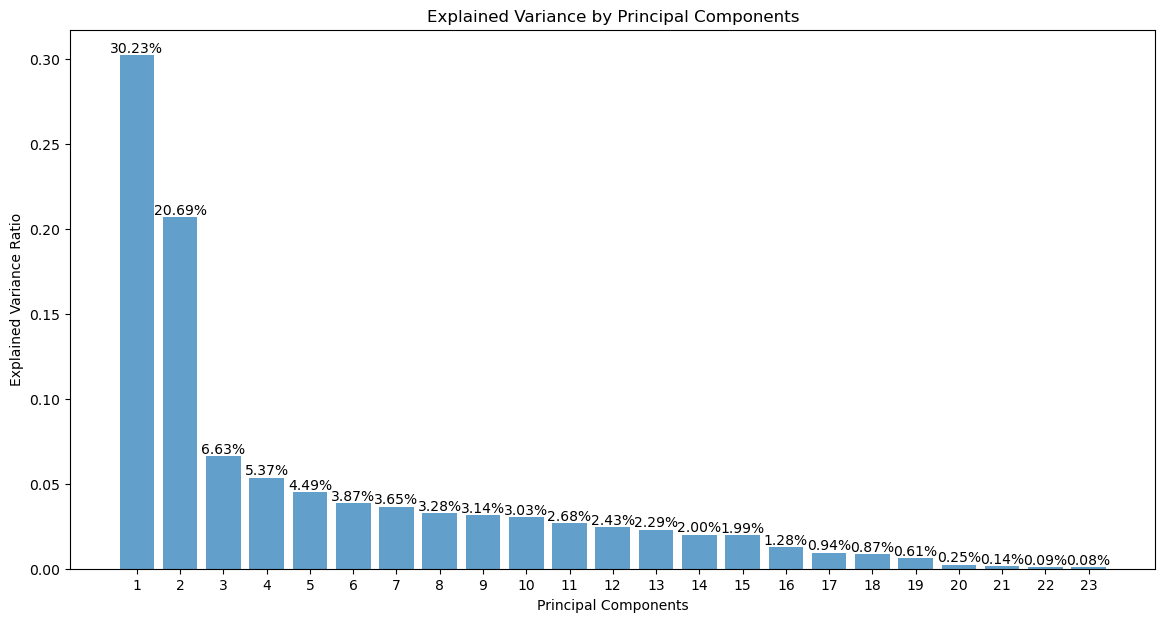

In [108]:
pca = PCA(n_components=23)
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(14, 7))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='C0')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))

for bar, var in zip(bars, explained_variance):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{var:.2%}', ha='center', va='bottom')

plt.savefig('explained-variance-by-pca.png', transparent=True)
plt.show()

# Step 3 - Training the models

### 3.1 - Train with the SMOTE data

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score


pca = PCA(n_components=5)
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_smote)

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_smote_pca, y_train_smote)
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_pca)
    print(f"--- {name} ---")
    print(classification_report(y_test_smote, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test_smote, y_proba)}\n")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      4687
           1       0.65      0.67      0.66      4687

    accuracy                           0.65      9374
   macro avg       0.65      0.65      0.65      9374
weighted avg       0.65      0.65      0.65      9374

ROC AUC: 0.7095754732720171

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      4687
           1       0.73      0.54      0.62      4687

    accuracy                           0.67      9374
   macro avg       0.68      0.67      0.66      9374
weighted avg       0.68      0.67      0.66      9374

ROC AUC: 0.7333958819770732

--- SVM ---
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      4687
           1       0.75      0.56      0.64      4687

    accuracy                           0.68      9374
   macro

### 3.2 - Train without the SMOTE data

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score


pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_pca)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}\n")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4687
           1       0.65      0.16      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.73      0.57      0.57      6000
weighted avg       0.77      0.80      0.74      6000

ROC AUC: 0.6987847477531394

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.56      0.30      0.39      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.62      0.63      6000
weighted avg       0.77      0.80      0.77      6000

ROC AUC: 0.7361021580814265

--- SVM ---
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4687
           1       0.62      0.22      0.33      1313

    accuracy                           0.80      6000
   macro